# Credit Card Fraud Detection Using Decision Tree and Support Vector Machine

The goal is to build a model that predicts if a credit card transaction is fraudulent or not.
The dataset includes information about transactions made by credit cards in September 2013 by European cardholders.
The feature of Principal Component Analysis. 

## Load package

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/graceluan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Import and Analyze the Data

In [5]:
url = '/Users/graceluan/Documents/Data Science Job Hunting/Credit Card Fraud Detection using SVM DT/creditcard.csv'
df= pd.read_csv(url)

In [6]:
df.head (3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
df.shape

(284807, 31)

- PCA features that cannot be disclosed
- Time: the seconds elapsed between each transaction and the first transaction in the dataset.

In [8]:
df.groupby('Class')['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

In [22]:
492/(492+284315)

0.001727485630620034

**Among 284,807 transactions, only 492 are fraud cases.** Given the class imbalance ratio, will measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [9]:
# inflate the original dataset
n_replicas = 10
big_df = pd.DataFrame(np.repeat(df.values, n_replicas, axis=0), columns=df.columns)

print("There are " + str(len(big_df)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_df.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_df.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


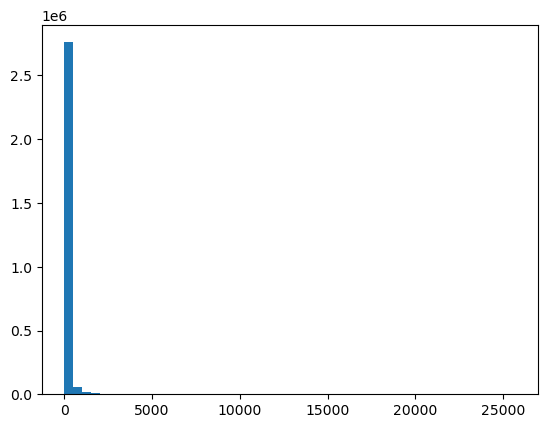

Minimum amount value is  0.0
Minimum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [10]:
#plot a histogram that shows the distribution of amount
plt.hist(big_df['Amount'], bins=50)
plt.show()
print("Minimum amount value is ", big_df['Amount'].min())
print("Minimum amount value is ", big_df['Amount'].max())
print("90% of the transactions have an amount less or equal than ", np.percentile(big_df['Amount'], 90))

## Data Preprocessing

In [11]:
#print('current pca feature mean:', np.mean(big_df, axis=0))  #mean should be close to 0

current pca feature mean: Time      9.481386e+04
V1       -1.324446e-14
V2        1.340438e-15
V3        6.550136e-14
V4        1.197344e-14
V5        2.283693e-14
V6        7.783620e-15
V7       -7.100028e-15
V8        2.583222e-15
V9       -6.537487e-15
V10       6.182062e-16
V11       2.134577e-14
V12      -2.236347e-15
V13       3.609760e-15
V14      -3.064187e-15
V15       3.201737e-15
V16       3.179961e-15
V17       3.004713e-16
V18       4.668248e-16
V19       1.277251e-15
V20       3.623509e-15
V21      -1.518032e-15
V22      -5.775379e-15
V23      -1.459613e-15
V24       3.022581e-15
V25       3.452266e-15
V26       3.369411e-15
V27      -2.127629e-16
V28      -2.997992e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64


In [12]:
# data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [13]:
big_df.columns 
#exclue Time feature
Z = big_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
Y = big_df['Class']

In [15]:
# Standardize Z
standardize = StandardScaler()
Z_stand = standardize.fit_transform(Z)

In [16]:
# normalize Z
normlizer = normalize(Z_stand,norm='l1')

In [17]:
Z_new = pd.DataFrame(normlizer, columns=Z.columns)
Z_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.056171,-0.003566,0.135345,0.078755,-0.019832,0.028081,0.015671,0.006686,0.026792,0.006747,...,0.026386,-0.002017,0.030977,-0.014314,0.008941,0.019951,-0.031731,0.026773,-0.005161,0.019820
1,-0.056171,-0.003566,0.135345,0.078755,-0.019832,0.028081,0.015671,0.006686,0.026792,0.006747,...,0.026386,-0.002017,0.030977,-0.014314,0.008941,0.019951,-0.031731,0.026773,-0.005161,0.019820
2,-0.056171,-0.003566,0.135345,0.078755,-0.019832,0.028081,0.015671,0.006686,0.026792,0.006747,...,0.026386,-0.002017,0.030977,-0.014314,0.008941,0.019951,-0.031731,0.026773,-0.005161,0.019820
3,-0.056171,-0.003566,0.135345,0.078755,-0.019832,0.028081,0.015671,0.006686,0.026792,0.006747,...,0.026386,-0.002017,0.030977,-0.014314,0.008941,0.019951,-0.031731,0.026773,-0.005161,0.019820
4,-0.056171,-0.003566,0.135345,0.078755,-0.019832,0.028081,0.015671,0.006686,0.026792,0.006747,...,0.026386,-0.002017,0.030977,-0.014314,0.008941,0.019951,-0.031731,0.026773,-0.005161,0.019820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848065,-0.020719,-0.008741,0.035291,-0.027204,-0.000692,-0.037096,0.096984,-0.026413,0.033668,-0.063962,...,0.037792,0.027039,0.067418,0.045904,0.001105,-0.069128,-0.129095,-0.000455,0.003146,0.039132
2848066,-0.020719,-0.008741,0.035291,-0.027204,-0.000692,-0.037096,0.096984,-0.026413,0.033668,-0.063962,...,0.037792,0.027039,0.067418,0.045904,0.001105,-0.069128,-0.129095,-0.000455,0.003146,0.039132
2848067,-0.020719,-0.008741,0.035291,-0.027204,-0.000692,-0.037096,0.096984,-0.026413,0.033668,-0.063962,...,0.037792,0.027039,0.067418,0.045904,0.001105,-0.069128,-0.129095,-0.000455,0.003146,0.039132
2848068,-0.020719,-0.008741,0.035291,-0.027204,-0.000692,-0.037096,0.096984,-0.026413,0.033668,-0.063962,...,0.037792,0.027039,0.067418,0.045904,0.001105,-0.069128,-0.129095,-0.000455,0.003146,0.039132


## Model Building

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [19]:
# split train and test dataset

x_train, x_test, y_train, y_test = train_test_split(Z_new,Y,test_size=0.3,stratify=Y, random_state=4)
# add the stratify parameter in train_test_split ensures that the proportions of the classes in the target variable (y) are preserved in both the training and testing datasets.
# This is particularly important when the dataset is imbalanced, meaning one class significantly outnumbers the others.

print('X_train.shape=', x_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', x_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


### Decision Tree

In [21]:
from sklearn.utils.class_weight import compute_sample_weight

In [24]:
#Compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset
#only 0.17% among all observations are fraud transactions
w_train = compute_sample_weight('balanced', y_train)
w_train

array([0.50086524, 0.50086524, 0.50086524, ..., 0.50086524, 0.50086524,
       0.50086524])

In [25]:

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
sklearn_dt.fit(x_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

#### Model Evaluation
Since the target label is quite imbalanced, we will use area under precesion recall curve to evaluate the model instead of the confusion matrix.

In [35]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

In [32]:
# predict the probabilities for class 1
y_score_dt = sklearn_dt.predict_proba(x_test)[:,1]

# calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test,y_score_dt)

auprc_dt = auc(recall, precision)

print(auprc_dt)
print(recall)
print(precision)

0.2118035011470123
[1.         1.         0.97628726 0.95799458 0.92344173 0.90311653
 0.87737127 0.84214092 0.83604336 0.0697832  0.        ]
[0.00172749 0.001802   0.00756379 0.01219575 0.03591757 0.05514189
 0.11511111 0.13874316 0.14410837 0.26822917 1.        ]


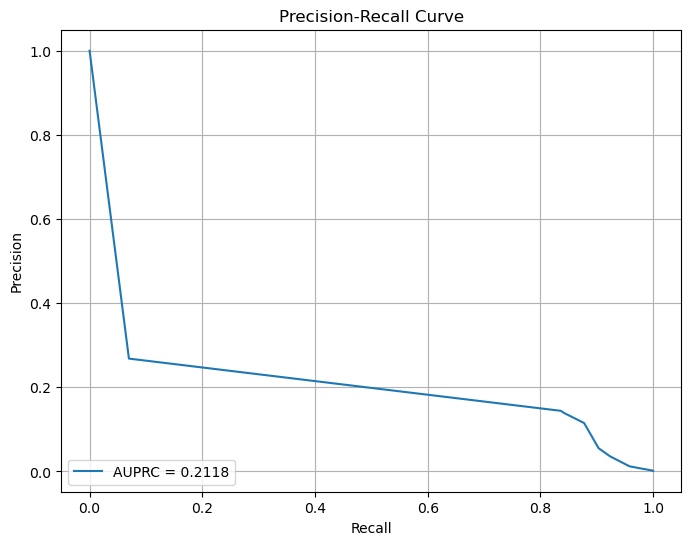

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc_dt:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

Auprc of 0.211 reflects poor performance in maintaining high precision and recall simultaneously for the fraud cases, aka the positive class. The model is not good at avoiding false positives, and capturing true positives, which will either overwhelm the analysts or miss important fraud cases.

In [36]:
# then evaluate compute area under the receiver operating characteristic
sklearn_roc_auc = roc_auc_score(y_test,y_score_dt)
sklearn_roc_auc

0.9746386622589825

High ROC AUC shows the model is good at distinguishing between the positive and negative classes.

### Support Vector Machine

In [28]:
from sklearn.svm import LinearSVC
sklearn_svm = LinearSVC(random_state=35)
sklearn_svm.fit(x_train, y_train, sample_weight=w_train)

/Users/graceluan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=35)

In [59]:
y_svm_score = sklearn_svm.decision_function(x_test) #get the confidence score
svm_roc_auc = roc_auc_score(y_test,y_svm_score)
print('ROC AUC score is:',svm_roc_auc)


ROC AUC score is: 0.9879755453054005


In [45]:
precision1, recall1, _ = precision_recall_curve(y_test,y_svm_score)
svm_auprc = auc(recall, precision)
print('AUPRC score is:',svm_auprc)

AUPRC score is: 0.2118035011470123


### Apple Synthetic Minority Over-Sampling Technique (SMOTE)

In [47]:
from imblearn.over_sampling import SMOTE
# the minority class (1) is replicated to increase its representation.
smote= SMOTE()

Z_smote, Y_smote = smote.fit_resample(Z,Y)
print('Z_smote:', Z_smote.shape, 'Z original', Z.shape)
print('Y_smote:', Y_smote.shape, 'Z original', Y.shape)

Z_smote: (5686300, 29) Z original (2848070, 29)
Y_smote: (5686300,) Z original (2848070,)


In [48]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(Z_smote,Y_smote,test_size=0.3,random_state=4)

In [57]:
dt_smote = DecisionTreeClassifier(max_depth=4,random_state=35)
dt_smote.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [58]:
y_dt_smote_score = dt_smote.predict_proba(x_test1)[:,1]
precision_smote, recall_smote, _ =precision_recall_curve(y_test1,y_dt_smote_score)
auprc_dt_smote = auc(precision_smote,recall_smote)
roc_auc_smote = roc_auc_score(y_test1,y_dt_smote_score)
print('AUPRC score is:', auprc_dt_smote)
print('ROC AUC score is:', roc_auc_smote)

AUPRC score is: 0.4842905317060594
ROC AUC score is: 0.9741669003853303


In [54]:
#checking the baseline
Y_smote.value_counts()

Class
0.0    2843150
1.0    2843150
Name: count, dtype: int64

SMOTE improve the decision tree model's AUPRC score, strengthing its ability to differentiate true and false positive cases. However, after SMOTE techniques, the fraud cases account for 50% of the data, an AUPRC of 0.484 is still not good enough.

In [60]:
y_svm_score1 = sklearn_svm.decision_function(x_test1) #get the confidence score
svm_roc_auc1 = roc_auc_score(y_test1,y_svm_score1)
print('ROC AUC score is:',svm_roc_auc1)


ROC AUC score is: 0.6340256243739628


In [61]:
precision2, recall2, _ = precision_recall_curve(y_test1,y_svm_score1)
svm_auprc2 = auc(recall2, precision2)
print('AUPRC score is:',svm_auprc2)

AUPRC score is: 0.5973642044199974
